## Лабораторная 4: восстановление плотности распределения

Данными в этом задании являются измерения некоторых проверочных параметров на конвейерах  сборки оборудования Bosh (см. [конкурс](https://www.kaggle.com/c/bosch-production-line-performance) «Bosch Production Line Performance» на Kaggle). 

Все исходные данные Bosh не помещаются в оперативную память компьютера, поэтому в файле `data.csv` — лишь некоторые признаки. Прочтите данные из файла `data.csv`. Целевым признаком здесь является `Response` — наличие брака в оборудовании. 

In [1]:
import pandas as pd

In [2]:
# место для кода
data = pd.read_csv('data.csv', delimiter=',')
data

,L1_S24_F1844,L1_S24_F1846,Response
0,-0.123,0.111,0
1,-0.269,0.175,0
2,-0.058,0.141,0
3,0.136,-0.145,0
4,0.045,-0.094,0
...,...,...,...
54724,0.145,-0.159,0
54725,-0.233,0.189,0
54726,0.013,0.134,0
54727,0.097,-0.155,0


In [3]:
data.groupby(data['Response']).count()

,L1_S24_F1844,L1_S24_F1846
Response,,
0,54175,54175
1,554,554


## 1 
Постройте на одном графике два приближения к плотности распределения признака `L1_S24_F1846` для `Response = 0` и для `Response = 1`, используя одно из следующих ядер (номер ядра выберите по формуле: `(n mod 6) + 1`, где `n` — ваш номер в списке группы):

    1.	кусочно-постоянное (прямоугольное) -  tophat
    2.	гауссовское -  gaussian
    3.	линейное (треугольник) -  linear
    4.	косинусоидальное -  cosine
    5.	квадратичное (Епанечникова) -  epanechnikov
    6.	экспоненциальное -  exponential


In [4]:
from sklearn.neighbors import KernelDensity
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


*Help:*

    i0 = data['Response'] == 0
    kde0 = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(data.loc[i0, 'L1_S24_F1846'].values.reshape(-1, 1))
    X_plot = np.linspace(-1, 1, 1000).reshape(-1, 1)
    Dens0 = np.exp(kde0.score_samples(X_plot))  # score_samples возвращает логарифм плотности

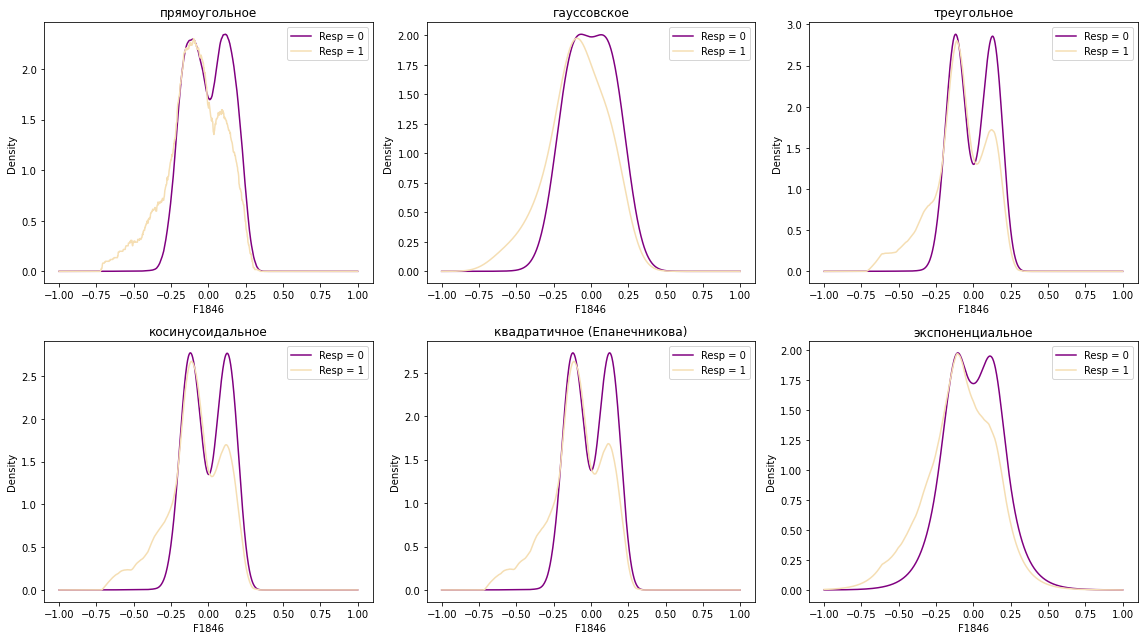

In [5]:
# место для кода
mask0 = data['Response'] == 0
mask1 = data['Response'] == 1

cores = ['tophat', 'gaussian', 'linear', 'cosine', 'epanechnikov', 'exponential']
titles = ['прямоугольное', 'гауссовское', 'треугольное',
          'косинусоидальное', 'квадратичное (Епанечникова)', 'экспоненциальное']



fig, axs = plt.subplots(2, 3, figsize=(16, 9), sharey=False,tight_layout=True)

X_plot = np.linspace(-1, 1, 1000).reshape(-1, 1)
for i in range(6):
    kde0 = KernelDensity(kernel=cores[i], bandwidth=0.1).fit(data.loc[mask0, 'L1_S24_F1846'].values.reshape(-1, 1))
    Dens0 = np.exp(kde0.score_samples(X_plot))
    
    kde1 = KernelDensity(kernel=cores[i], bandwidth=0.1).fit(data.loc[mask1, 'L1_S24_F1846'].values.reshape(-1, 1))
    Dens1 = np.exp(kde1.score_samples(X_plot)) 
    
    
    axs[i//3, i%3].plot(X_plot, Dens0, color='purple')
    axs[i//3, i%3].plot(X_plot, Dens1, color='#F5DEB3')
    
    axs[i//3, i%3].set_title(titles[i])
    axs[i//3, i%3].set_ylabel('Density')
    axs[i//3, i%3].set_xlabel('F1846')
    axs[i//3, i%3].legend(['Resp = 0', 'Resp = 1'])


In [ ]:
#Ответ:
#  нет...?
#
# ?если бы была, то было бы 2 холмика рядом друг с другом, хоть и немного пересекающихся (?),
#   а тут холмик вхолмике,
#   хотя и на отрезке [0, 0.25] пик reps=1 несколько меньше пика resp=0,
#        а на [-0.75,-0.25] плотность resp=1 сильно преобладает,
# (?) но в сравнении с схожестью наибольшей плотности в середине, разница не настолько значительна?

Ответьте в комментариях на вопрос: является ли выборка хорошо разделимой по признаку  `L1_S24_F1846`?

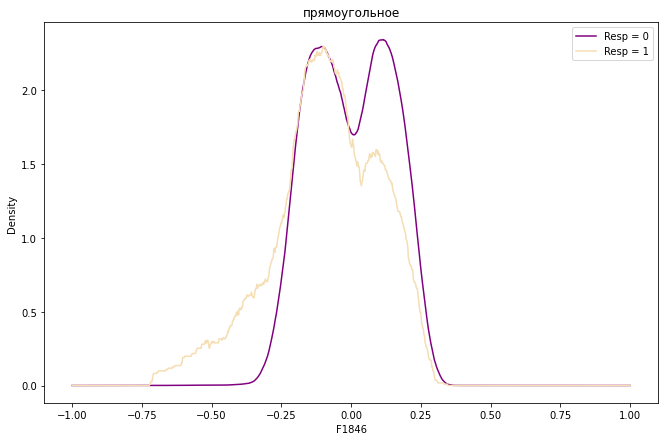

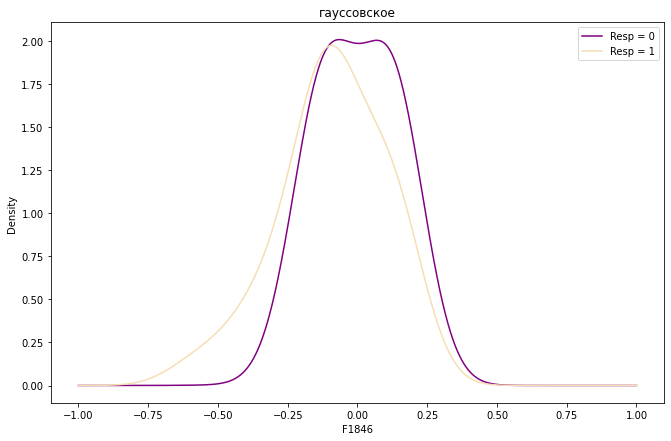

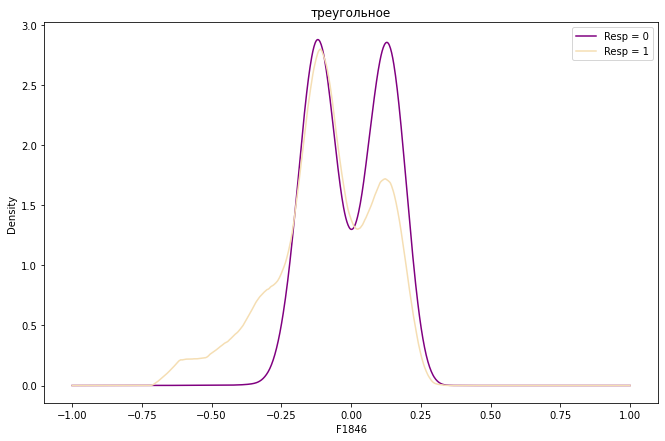

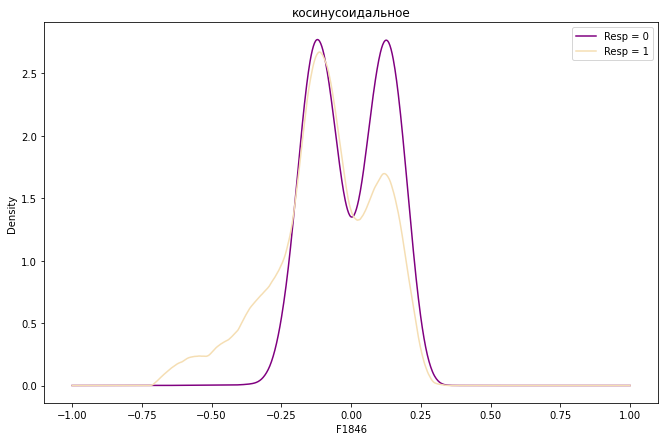

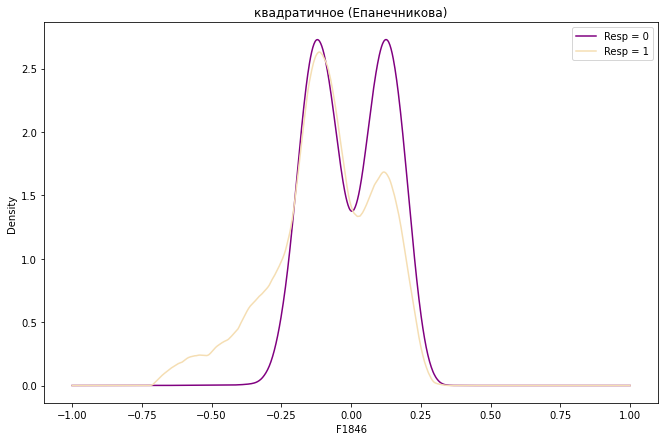

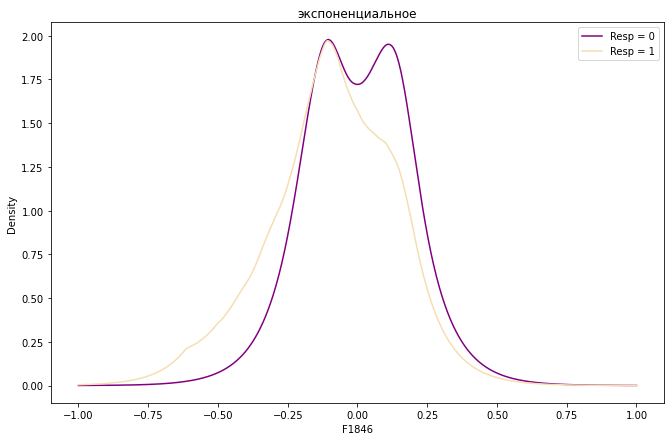

In [6]:
# место для комментария
for i in range(6):
    plt.figure(figsize=(11,7))

    kde0 = KernelDensity(kernel=cores[i], bandwidth=0.1).fit(data.loc[mask0, 'L1_S24_F1846'].values.reshape(-1, 1))
    Dens0 = np.exp(kde0.score_samples(X_plot))
    kde1 = KernelDensity(kernel=cores[i], bandwidth=0.1).fit(data.loc[mask1, 'L1_S24_F1846'].values.reshape(-1, 1))
    Dens1 = np.exp(kde1.score_samples(X_plot)) 
    
    plt.plot(X_plot, Dens0, color='purple')
    plt.plot(X_plot, Dens1, color='#F5DEB3')
    
    plt.title(titles[i])
    plt.ylabel('Density')
    plt.xlabel('F1846')
    plt.legend(['Resp = 0', 'Resp = 1'])

    plt.show()

## 2

Разбейте выборку `data` на две равные части: тренировочную `dataTrain` и проверочную `dataTest`. 

In [7]:
dataTrain = data.loc[0:data.shape[0] / 2, ].reset_index(drop=True)
dataTest = data.loc[data.shape[0] / 2:data.shape[0], ].reset_index(drop=True)

Пользуясь кросс-валидацией, подберите **для каждого класса `Response` (`r=0` и `r=1`)** значение ширины ядра `bandwidth`, при котором логарифм правдоподобия максимален на проверочной выборке.

*Help:*

    r = 0
    kde0 = KernelDensity(kernel='gaussian', bandwidth=0.05)
    kde0.fit(dataTrain.loc[dataTrain['Response']==r, 'L1_S24_F1846'].values.reshape(-1, 1))
    logProbability0 = kde0.score_samples(dataTest.loc[dataTest['Response']==r, 'L1_S24_F1846'].values.reshape(-1, 1))
    logProbability0[np.isinf(logProbability0)] = -100 # заменяем -бесконечность
    logLikehood0 = logProbability0.sum()
    print(logLikehood0)

In [8]:
max_lh0 = 0
max_bw0 = 0.01

max_lh1 = 0
max_bw1 = 0.016

In [9]:
# место для кода
r = 0

bw = 0.01


kde0 = KernelDensity(kernel='gaussian', bandwidth=bw)
kde0.fit(dataTrain.loc[dataTrain['Response']==r, 'L1_S24_F1846'].values.reshape(-1, 1))

logProbability0 = kde0.score_samples(dataTest.loc[dataTest['Response']==r, 'L1_S24_F1846'].values.reshape(-1, 1))
logProbability0[np.isinf(logProbability0)] = -100 # заменяем -бесконечность
logLikehood0 = logProbability0.sum()


if logLikehood0 > max_lh0: #likelihood?
    max_lh0 = logLikehood0
    max_bw0 = bw

print(f'cur: lh={logLikehood0}; bw={bw}')
print(f'max: lh={max_lh0}; bw={max_bw0}')

cur: lh=22283.59954886804; bw=0.01
max: lh=22283.59954886804; bw=0.01


In [74]:
#np.random.random(10)

array([0.59422894, 0.3617963 , 0.66799272, 0.32244721, 0.77141154,
       0.34296601, 0.40915377, 0.71742242, 0.77056761, 0.16592026])

In [10]:
r = 1

bw = 0.016


kde1 = KernelDensity(kernel='gaussian', bandwidth=bw)
kde1.fit(dataTrain.loc[dataTrain['Response']==r, 'L1_S24_F1846'].values.reshape(-1, 1))

logProbability1 = kde1.score_samples(dataTest.loc[dataTest['Response']==r, 'L1_S24_F1846'].values.reshape(-1, 1))
logProbability1[np.isinf(logProbability1)] = -100 # заменяем -бесконечность
logLikehood1 = logProbability1.sum()


if logLikehood1 > max_lh1: #likelihood?
    max_lh1 = logLikehood1
    max_bw1 = bw

print(f'cur: lh={logLikehood1}; bw={bw}')
print(f'max: lh={max_lh1}; bw={max_bw1}')

cur: lh=113.87328555340314; bw=0.016
max: lh=113.87328555340314; bw=0.016


In [17]:
bws = np.random.random(15)
print(bws)
print('-'*50)

for bw in bws:
    kde0 = KernelDensity(kernel='gaussian', bandwidth=bw)
    kde0.fit(dataTrain.loc[dataTrain['Response']==0, 'L1_S24_F1846'].values.reshape(-1, 1))
    logProbability0 = kde0.score_samples(dataTest.loc[dataTest['Response']==0, 'L1_S24_F1846'].values.reshape(-1, 1))
    logProbability0[np.isinf(logProbability0)] = -100 # заменяем -бесконечность
    logLikehood0 = logProbability0.sum()

    kde1 = KernelDensity(kernel='gaussian', bandwidth=bw)
    kde1.fit(dataTrain.loc[dataTrain['Response']==1, 'L1_S24_F1846'].values.reshape(-1, 1))
    logProbability1 = kde1.score_samples(dataTest.loc[dataTest['Response']==1, 'L1_S24_F1846'].values.reshape(-1, 1))
    logProbability1[np.isinf(logProbability1)] = -100 # заменяем -бесконечность
    logLikehood1 = logProbability1.sum()


    if logLikehood0 > max_lh0: #likelihood?
        max_lh0 = logLikehood0
        max_bw0 = bw
    if logLikehood1 > max_lh1: #likelihood?
        max_lh1 = logLikehood1
        max_bw1 = bw


    print(f'cur0: lh={logLikehood0}; bw={bw}')
    print(f'max0: lh={max_lh0}; bw={max_bw0}')
    print()
    print(f'cur1: lh={logLikehood1}; bw={bw}')
    print(f'max1: lh={max_lh1}; bw={max_bw1}')
    print('-'*50)

[0.82310475 0.49056203 0.28719905 0.25259039 0.29577605 0.24322336
 0.55157659 0.77150468 0.05319702 0.52142107 0.09099572 0.4118804
 0.44178161 0.78983675 0.68471479]
--------------------------------------------------
cur0: lh=-20332.028732556013; bw=0.8231047489386158
max0: lh=15942.910918851769; bw=0.1

cur1: lh=-202.7034312665882; bw=0.8231047489386158
max1: lh=113.87328555340314; bw=0.016
--------------------------------------------------
cur0: lh=-7527.094670886514; bw=0.49056202750950706
max0: lh=15942.910918851769; bw=0.1

cur1: lh=-88.19227461861263; bw=0.49056202750950706
max1: lh=113.87328555340314; bw=0.016
--------------------------------------------------
cur0: lh=3734.913247170246; bw=0.28719905319779504
max0: lh=15942.910918851769; bw=0.1

cur1: lh=2.753272940990364; bw=0.28719905319779504
max1: lh=113.87328555340314; bw=0.016
--------------------------------------------------
cur0: lh=5935.169972606889; bw=0.25259038848379456
max0: lh=15942.910918851769; bw=0.1

cur1: 

### 3

Для найденных наилучших `bandwidth` вычислите `p(x|0)` и `p(x|1)` для тестовой выборки. 

In [24]:
#фиксируем лучшие bandwidh
kde0 = KernelDensity(kernel='gaussian', bandwidth=max_bw0)
kde0.fit(dataTest.loc[dataTrain['Response']==0, 'L1_S24_F1846'].values.reshape(-1, 1))

kde1 = KernelDensity(kernel='gaussian', bandwidth=max_bw1)
kde1.fit(dataTest.loc[dataTrain['Response']==1, 'L1_S24_F1846'].values.reshape(-1, 1))



#bw_mean = (max_bw0+max_bw1)/2
#kde_test_X = KernelDensity(kernel='gaussian', bandwidth=bw_mean).fit(dataTest['L1_S24_F1846'].values.reshape(-1, 1))
#predictionProbX = np.exp(kde_test_X.score_samples(dataTest['L1_S24_F1846'].values.reshape(-1, 1)))


KernelDensity(bandwidth=0.016)

In [25]:
predictionProb0 = sum(dataTrain['Response']==0)/len(dataTrain)
predictionProb1 = sum(dataTrain['Response']==1)/len(dataTrain)
predictionProb0, predictionProb1, predictionProb0+predictionProb1

(0.9893294354101955, 0.010670564589804496, 1.0)

In [26]:
predictionProbXafter0 = np.exp(kde0.score_samples(dataTest['L1_S24_F1846'].values.reshape(-1, 1)))
predictionProbXafter1 = np.exp(kde1.score_samples(dataTest['L1_S24_F1846'].values.reshape(-1, 1)))

In [27]:
#по формуле полной вероятности
predictionProbX = predictionProbXafter0*predictionProb0 + predictionProbXafter1*predictionProb1

По формуле Байеса найдите затем `p(0|x)` и `p(1|x)`.

Отсортируйте все объекты тестовой выборки по возрастанию предсказанной вероятности `p(1|x)`, выведите на экран вероятности для последних 10 объектов и рассчитайте количество бракованных деталей среди последних 100 объектов в отсортированном ряду.

*Help:*
    
    ind = np.argsort(predictionProb1afterX) - сортировка, возвращающая индексы элементов
    print(predictionProb1afterX[ind[-10:]]) - вывод последних 10 элементов
    print(sum(dataTest.loc[ind[-100:],'Response'])) - количество бракованных среди 100 с максимальной вероятностью брака

In [28]:
# место для кода
#P(A|B) = P(B|A)* P(A)/P(B)

predictionProb1afterX = predictionProbXafter1 * predictionProb1 / predictionProbX

predictionProb0afterX = predictionProbXafter0 * predictionProb0 / predictionProbX

print(predictionProb1afterX, predictionProb0afterX, '', predictionProb1afterX+predictionProb0afterX, sep='\n')

[0.0085705  0.01119056 0.01069543 ... 0.0102793  0.01225113 0.01106962]
[0.9914295  0.98880944 0.98930457 ... 0.9897207  0.98774887 0.98893038]

[1. 1. 1. ... 1. 1. 1.]


In [29]:
ind = np.argsort(predictionProb1afterX)  #сортировка, возвращающая индексы элементов

print(predictionProb1afterX[ind[-10:]])  #вывод последних 10 элементов

print(sum(dataTest.loc[ind[-100:],'Response'])) #количество бракованных среди 100 с максимальной вероятностью брака

[0.02218089 0.02218089 0.02218089 0.02218089 0.0221836  0.0221836
 0.0221836  0.0221836  0.0221836  0.0221836 ]
0


In [30]:
dataTest.loc[ind[-10:], :]

,L1_S24_F1844,L1_S24_F1846,Response
1669,-0.383,0.242,0
24960,-0.384,0.242,0
24697,-0.323,0.242,0
19600,-0.358,0.242,0
16845,-0.366,0.241,0
23390,-0.313,0.241,0
24270,-0.360,0.241,0
8048,-0.356,0.241,0
443,-0.281,0.241,0
18490,-0.381,0.241,0


In [31]:
predictionProbXafter0.shape

(27364,)

In [33]:
predictionProbXafter0

array([1.59495353, 2.9776433 , 3.45303262, ..., 3.51398857, 2.75109126,
       3.78220478])